In [10]:
import json
with open('data/part_processed.json') as json_file:
    json_data = []
    for line in json_file:
        json_data.append(json.loads(line))
# with open("data/2019-06-27.10_00_59_059.full.Program.json") as f:
#     id_name_lookup = {}
#     for line in f:
#         info = json.loads(line)
#         id_name_lookup[info["_id"]] = info

In [11]:
json_data = json_data[0]
print("number of data points: ",len(json_data))

number of data points:  150583


In [214]:
dataset = []
for i in range(len(json_data)):
    instance = json_data[i]
    n = len(instance)-1
    queries = []
    for j in range(n):
        queries.append(instance[j]["transcription"])
    companyname = instance[n]["companyName"]
    programname = instance[n]["programName"]
    #instance[n]["programId"]
    if programname == "":
        programname = instance[n]["programId"]
    dataset.append((queries, companyname,programname))

In [215]:
for i in range(500):
    print(dataset[i])

(['YouTube'], 'Fox Broadcasting Company', '9105955031531802112')
(['Fox News'], 'Fox News Channel', '6895049357987567112')
(['YouTube'], 'American Broadcasting Company', 'Action News 6PM')
(['Hallmark'], 'Hallmark Channel', '7967107554898292112')
(['Perry Mason', 'Perry Mason'], 'Hallmark Channel', '6175766128534202112')
(['Recordings'], 'Columbia Broadcasting System', '7926594964225998112')
(['Recordings'], 'American Broadcasting Company', '7698292619757465112')
(['Netflix'], 'Independent Broadcasters', '6876884752569806112')
(['YouTube'], 'Independent Broadcasters', '7 News Today in New England')
(['Netflix'], 'USA Network', '4875443890456817112')
(['YouTube'], 'Primo TV', '7618227564884560112')
(['YouTube'], 'The Filipino Channel', "FPJ's Ang Probinsyano")
(['YouTube'], 'Public Broadcasting Service', '8271846194682801112')
(['YouTube'], 'Entertainment Sports Programming Network', 'NBA: The Jump')
(['Netflix'], 'STARZ', 'The Front Runner')
(['Netflix'], 'Fox Broadcasting Company', '8

In [216]:
from collections import defaultdict
def data_alloc(idx1,idx2):
    tmp = defaultdict(lambda: defaultdict(int))
    for i in range(len(dataset)):
        queries = dataset[i][idx1]
        to = dataset[i][idx2]
        if isinstance(queries,list):
            n = len(queries)-1
            queries = queries[n]
        if isinstance(to,list):
            to = to[0]
        n = len(queries)-1
        tmp[queries][to] +=1
    return tmp

In [217]:
query2company = data_alloc(0,1)
query2program = data_alloc(0,2)
#query2programId ?

In [218]:
query2company["YouTube"]

defaultdict(int,
            {'Fox Broadcasting Company': 711,
             'American Broadcasting Company': 853,
             'Independent Broadcasters': 203,
             'Primo TV': 6,
             'The Filipino Channel': 167,
             'Public Broadcasting Service': 443,
             'Entertainment Sports Programming Network': 730,
             'The CBS-Warner Network': 252,
             'Black Entertainment Television': 940,
             'STARZ': 360,
             'Music Television': 486,
             'Telemundo': 477,
             'FX': 213,
             'Disney Channel': 2366,
             'UniMás': 202,
             'BBC America': 54,
             'FOX Sports 1': 194,
             'History Channel': 209,
             'Flix': 67,
             'Home & Garden Television': 407,
             'TeenNick': 262,
             'Nickelodeon': 2629,
             'ION Media Networks': 230,
             '': 1330,
             'NBC Sports Regional': 58,
             'National Broadcasting C

In [171]:
query2company["CBS"]

defaultdict(int,
            {'Columbia Broadcasting System': 1185,
             'Hallmark Channel': 1,
             'MeTV': 2,
             'National Broadcasting Company': 2,
             'MSNBC': 1,
             'Lifetime Networks': 1,
             'Home & Garden Television': 1,
             '': 1})

In [506]:
# 2 ways of measuing non-uniformity
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from fractions import Fraction
import math
def plot_freq(arr, key,top, tilt=20, m=""):
    # plot bar graph of top frequency data
    data = Counter(dict(arr[key]))
    data = data.most_common(top)
    
    x = np.arange(len(data))
    freq = [y[1] for y in data]
    label = [y[0] for y in data]
    plt.tight_layout
    plt.figure(figsize=(28,10))
    plt.bar(x,height = freq)
    plt.xticks(x, label,rotation=tilt) # no need to add .5 anymore
    plt.title(m,fontsize=35)
    plt.show()
def compute_entropy(data, key, m, tilt,top = 20):
    data[key].pop("", None)
    if m!="":
        plot_freq(data,key,top,tilt,m)
    data = Counter(dict(data[key]))
    data = data.most_common(top)
    total_count = sum([x[1] for x in data])
#     print([math.log(Fraction(x[1],total_count))  for x in data])
    H = sum([Fraction(x[1],total_count) *math.log(Fraction(x[1],total_count))  for x in data]) * -1
#     print("Entrophy is %f" % (H))
    return H
    
def compute_l2(data, key, m, tilt,top = 20):
    
    if m!="":
        plot_freq(data,key,top,tilt,m)
    data = Counter(dict(data[key]))
    data = data.most_common(top)
    total_count = sum([x[1] for x in data])
    norm = Fraction(1,len(data))
#     print(total_count, norm)
    M = sum([(Fraction(x[1],total_count)-norm)**2 for x in data])
#     print("The l2 distance is %f"%(M))
    return M
def compute_KL_distance(data, key, m, tilt,top = 20):
    if m!="":
        plot_freq(data,key,top,tilt,m)
    data = Counter(dict(data[key]))
    top = len(data)
    data = data.most_common(top)
    total_count = sum([x[1] for x in data])
#     print([math.log(Fraction(x[1],total_count))  for x in data])
    Q = Fraction(1, top)
    D = sum([Fraction(x[1],total_count) *math.log(Fraction(Fraction(x[1],total_count), Q))  for x in data])
    print("Entrophy is %f" % (D))
    return D

In [495]:
def total(data):
    return sum([x[1] for x in data.items()])

In [496]:
print("total number of unique queries %d" %(len(query2company)))
print("total number of queries with exactly 1 data point %d" %(sum([1 if (total(query2company[x])==1) else 0 for x in query2company])))
print("total number of queries with exactly 2 data point %d" %(sum([1 if (total(query2company[x])==2) else 0 for x in query2company])))
print("total number of queries with exactly 3 data point %d" %(sum([1 if (total(query2company[x])==3) else 0 for x in query2company])))




total number of unique queries 12982
total number of queries with exactly 1 data point 9460
total number of queries with exactly 2 data point 1262
total number of queries with exactly 3 data point 529


In [261]:
12982-9460-1262-529

1731

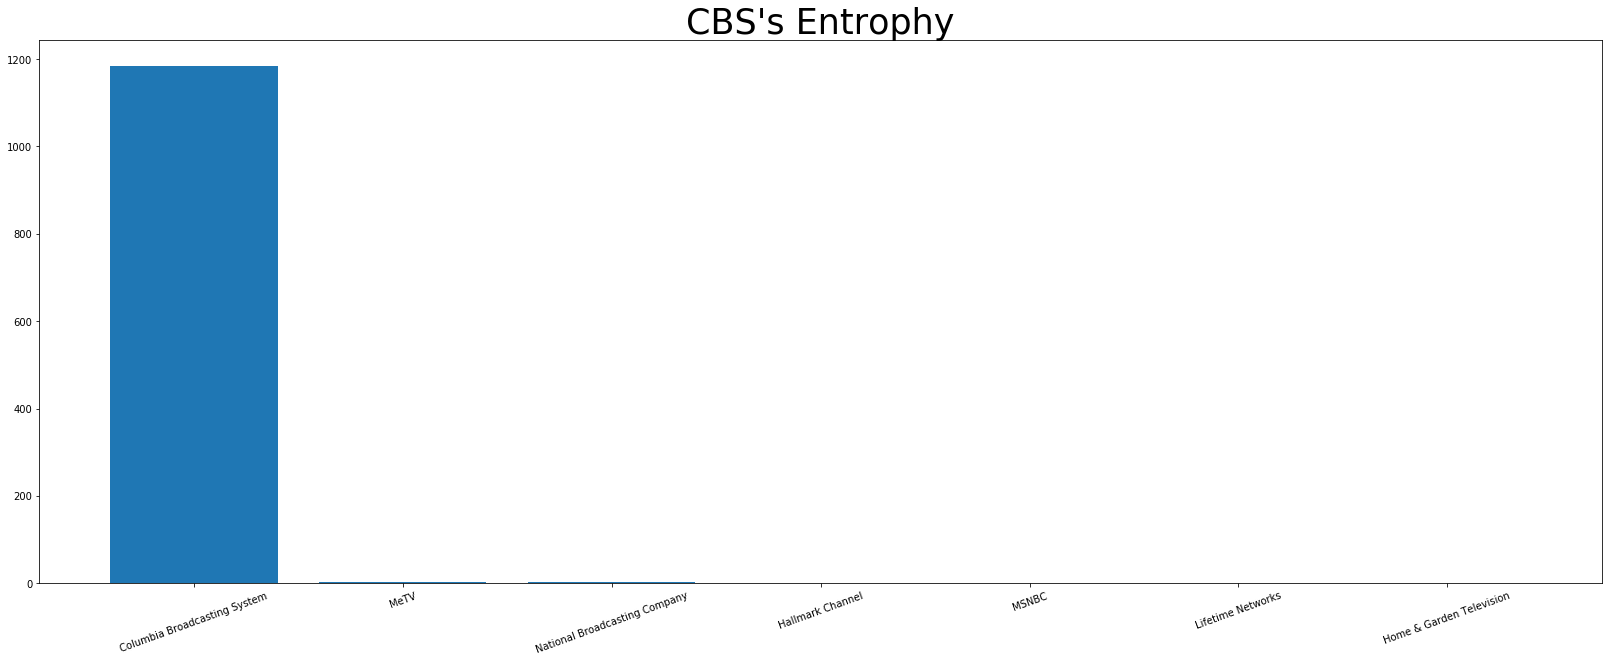

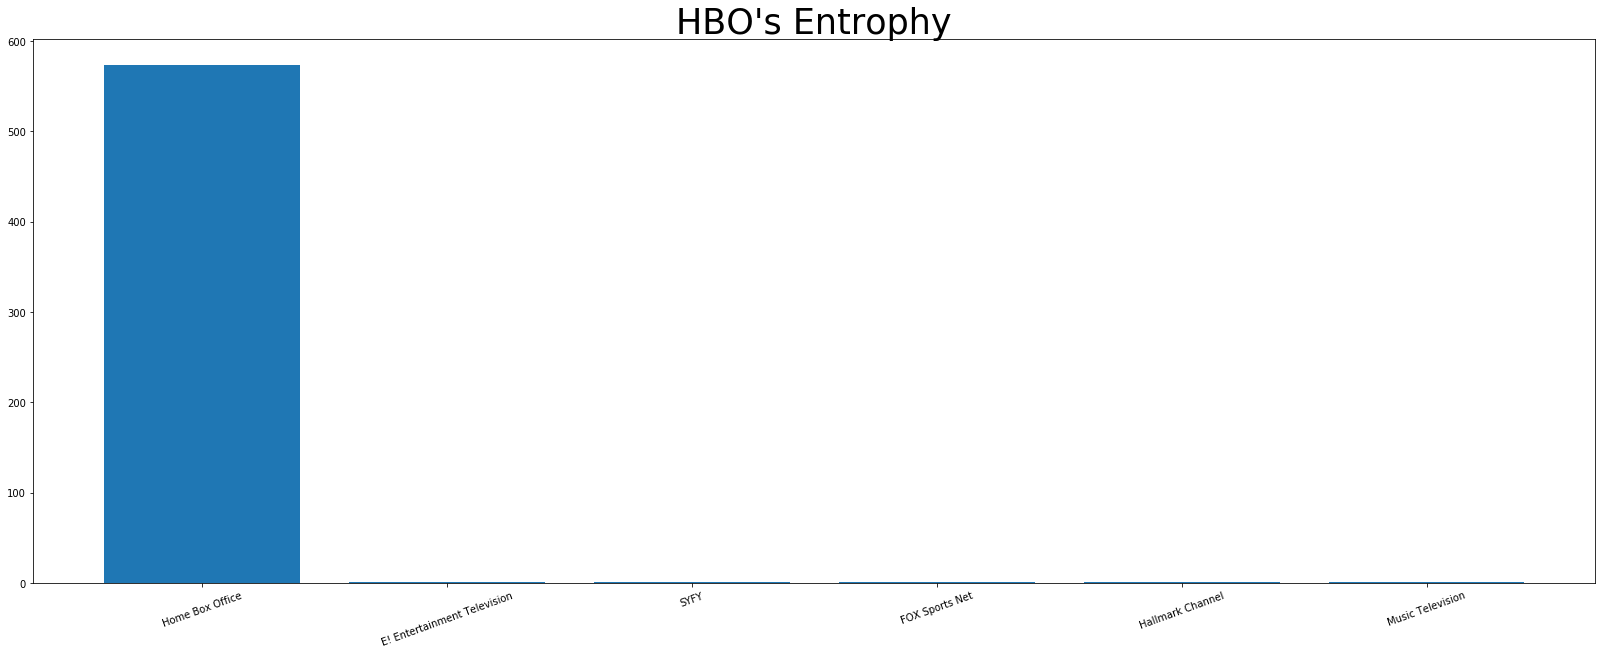

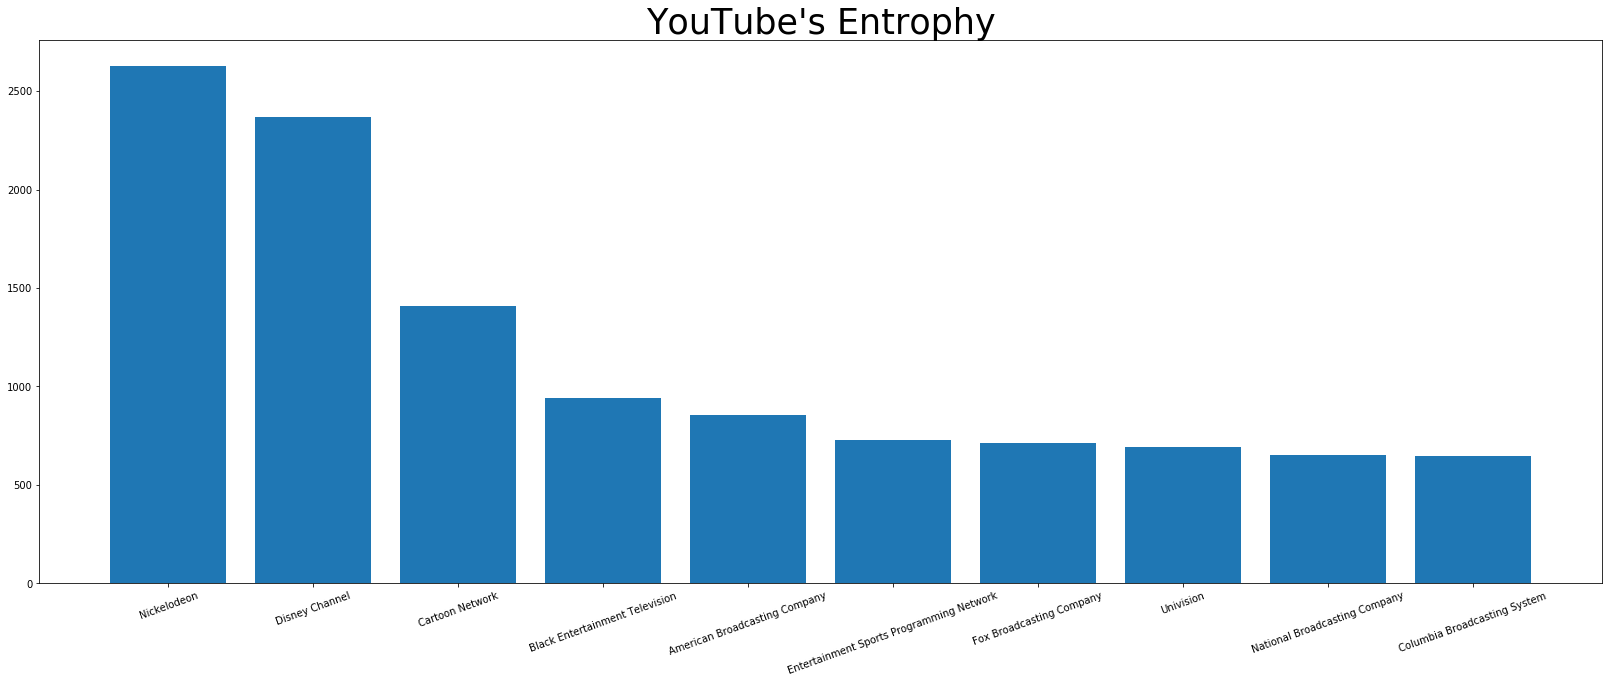

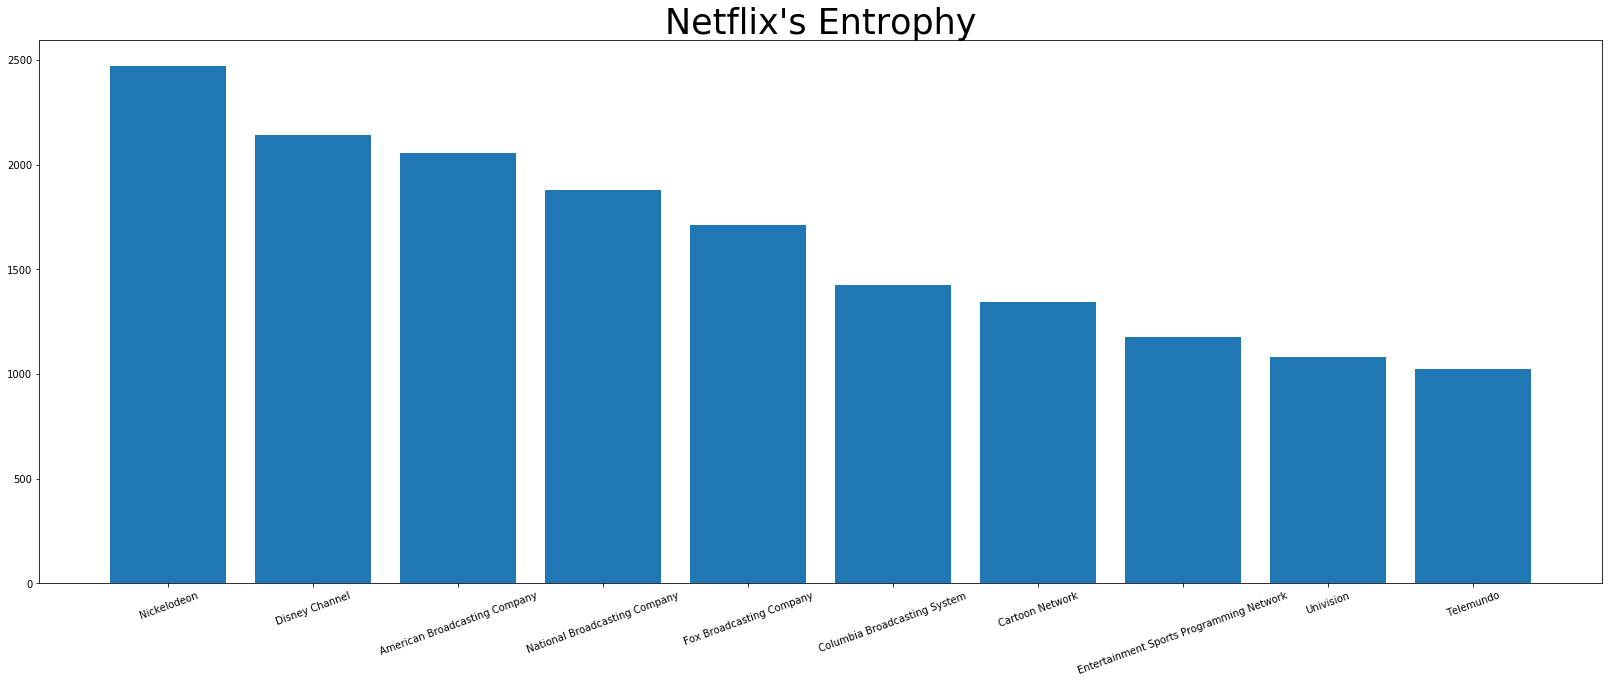

2.260950920670917

In [507]:
top = 10
compute_entropy(query2company,"CBS","CBS's Entrophy",20,top)
compute_entropy(query2company,"HBO","HBO's Entrophy",20,top)

compute_entropy(query2company,"YouTube","YouTube's Entrophy",20,top)
compute_entropy(query2company,"Netflix","Netflix's Entrophy",20,top)

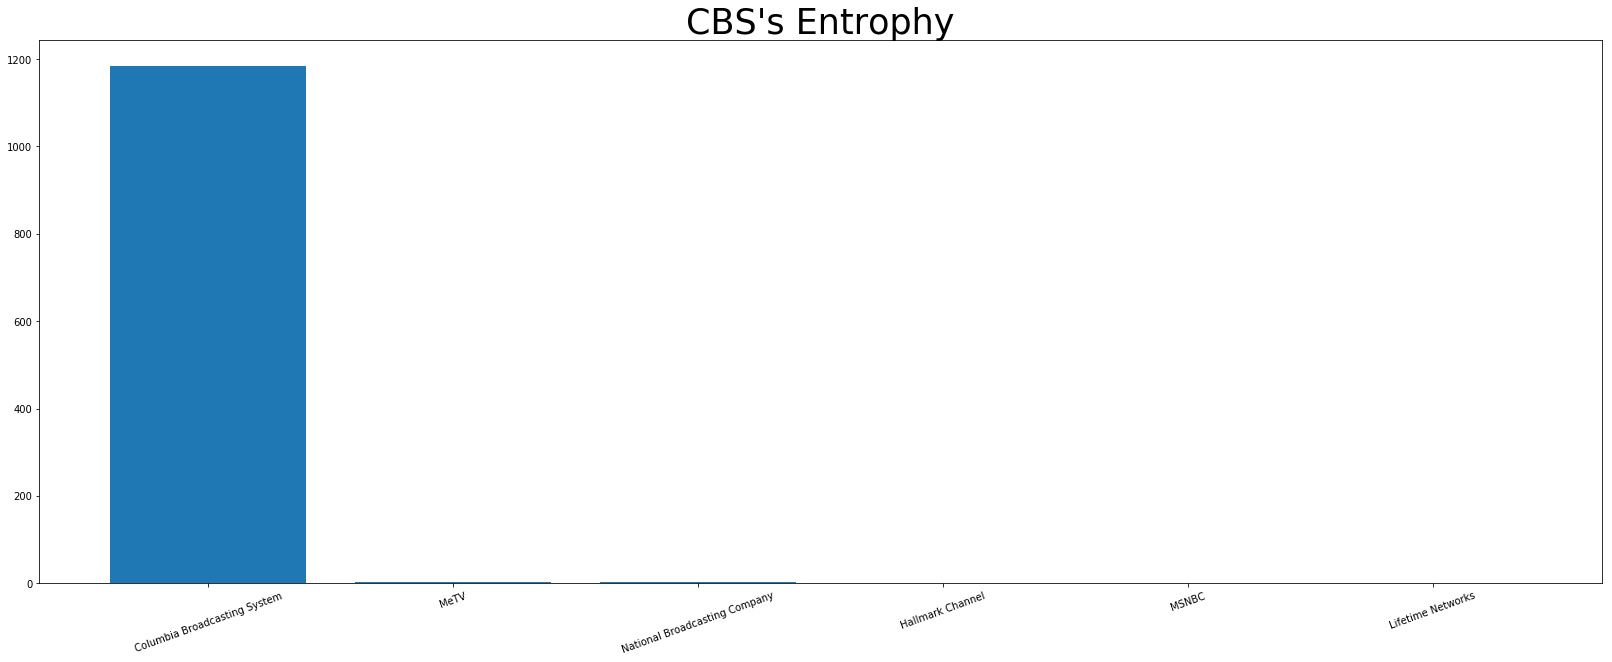

1192 1/6
The l2 distance is 0.821631


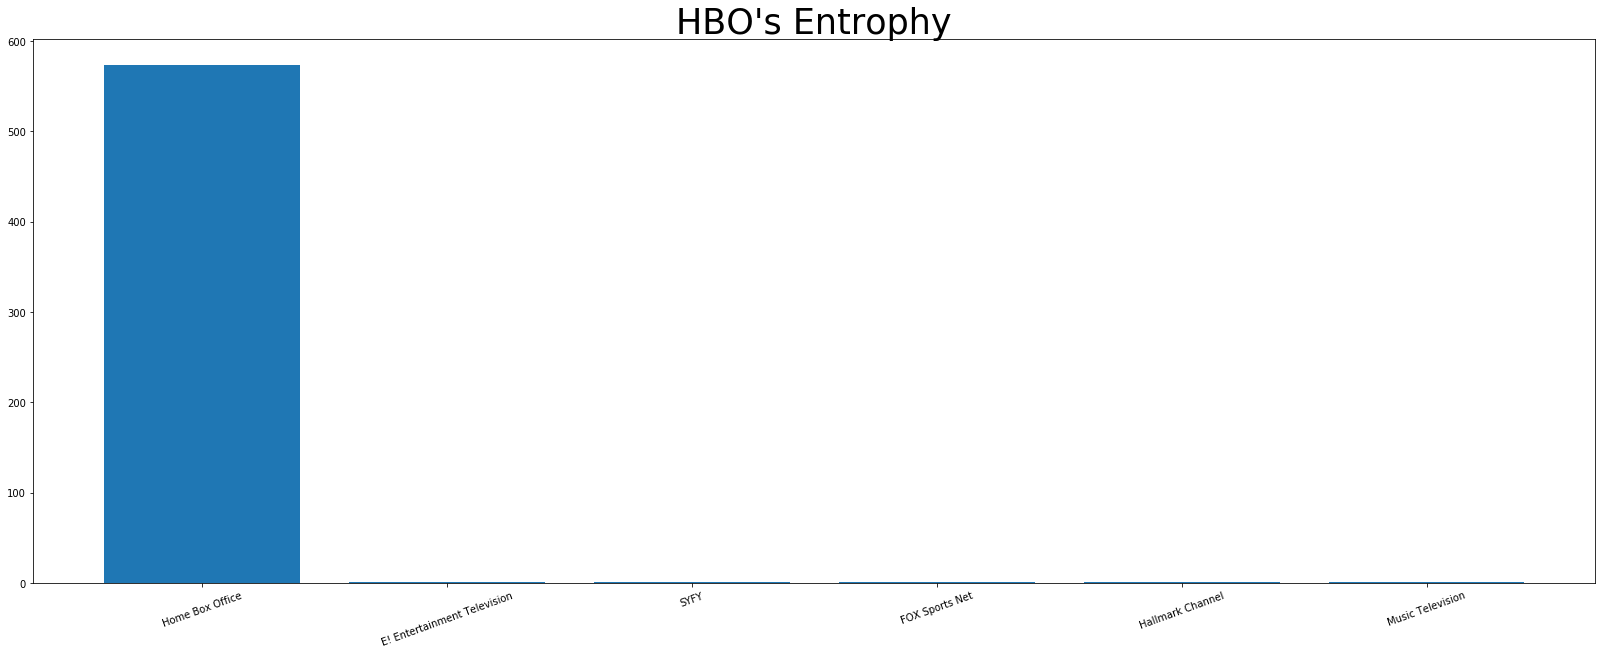

578 1/6
The l2 distance is 0.816122


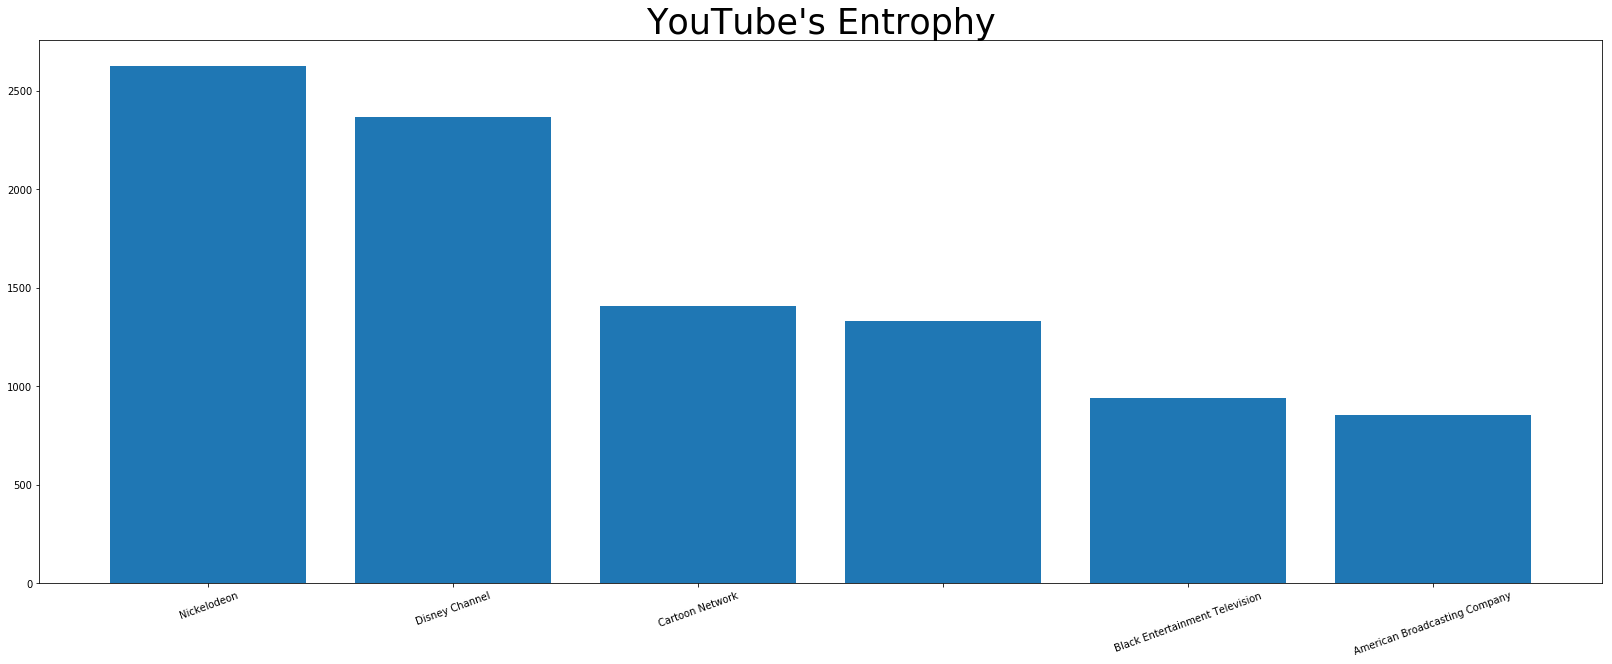

9526 1/6
The l2 distance is 0.030283


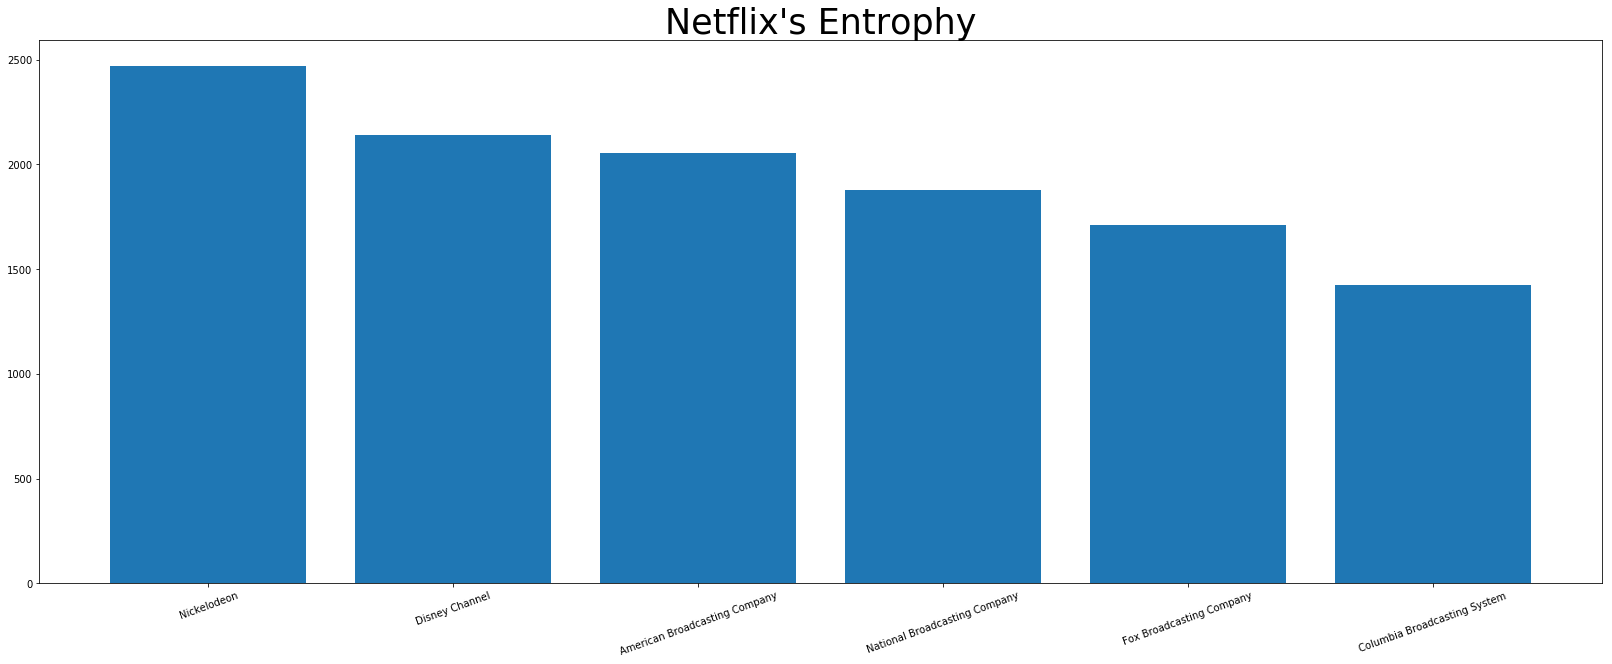

11682 1/6
The l2 distance is 0.004840


Fraction(165130, 34117281)

In [228]:
top=6
compute_l2(query2company,"CBS","CBS's Entrophy",20,top)
compute_l2(query2company,"HBO","HBO's Entrophy",20,top)

compute_l2(query2company,"YouTube","YouTube's Entrophy",20,top)
compute_l2(query2company,"Netflix","Netflix's Entrophy",20,top)

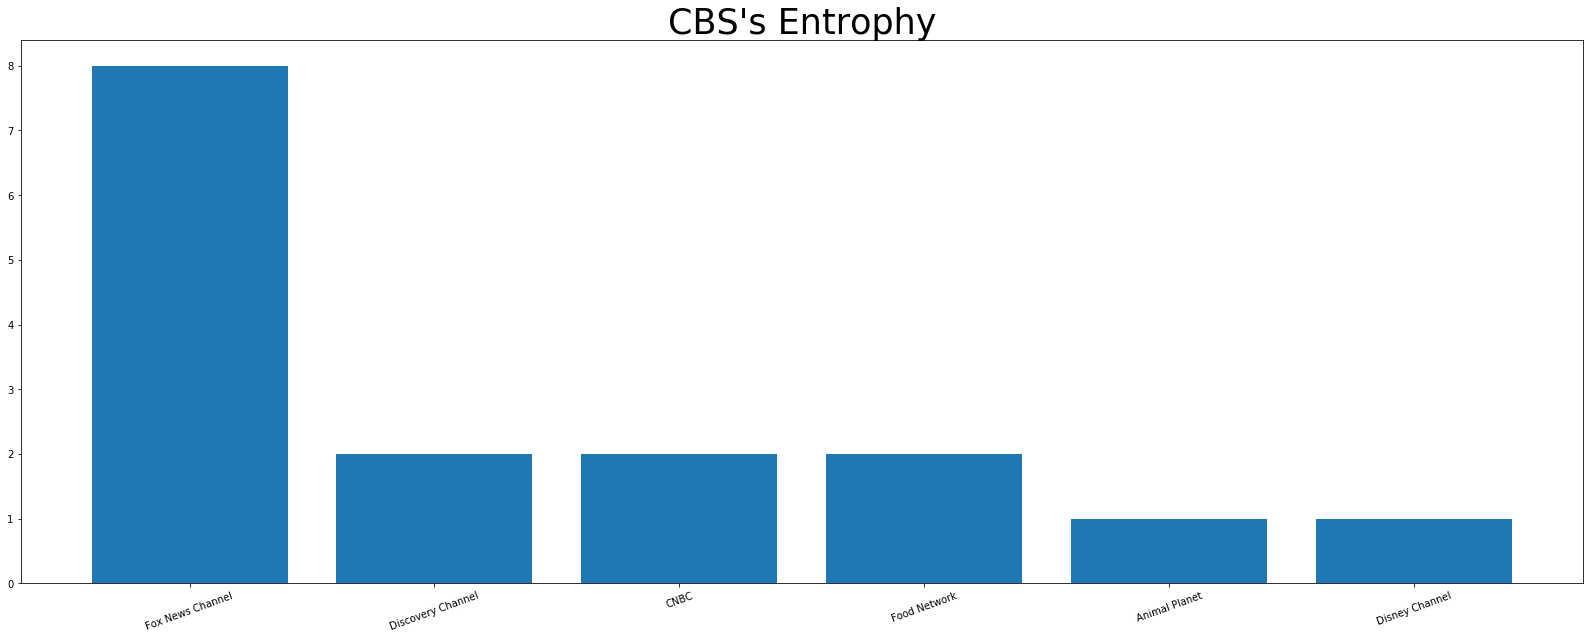

Entrophy is 0.346574


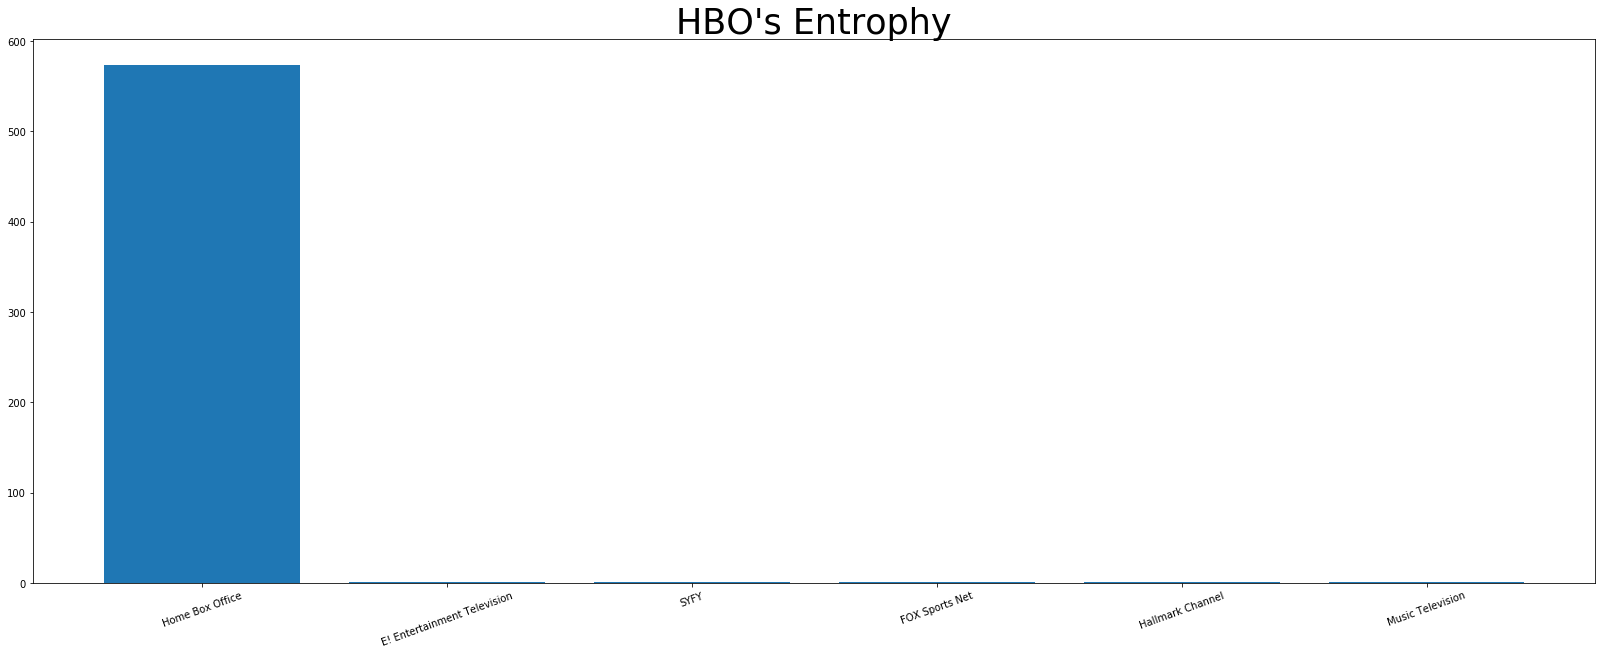

Entrophy is 1.728133


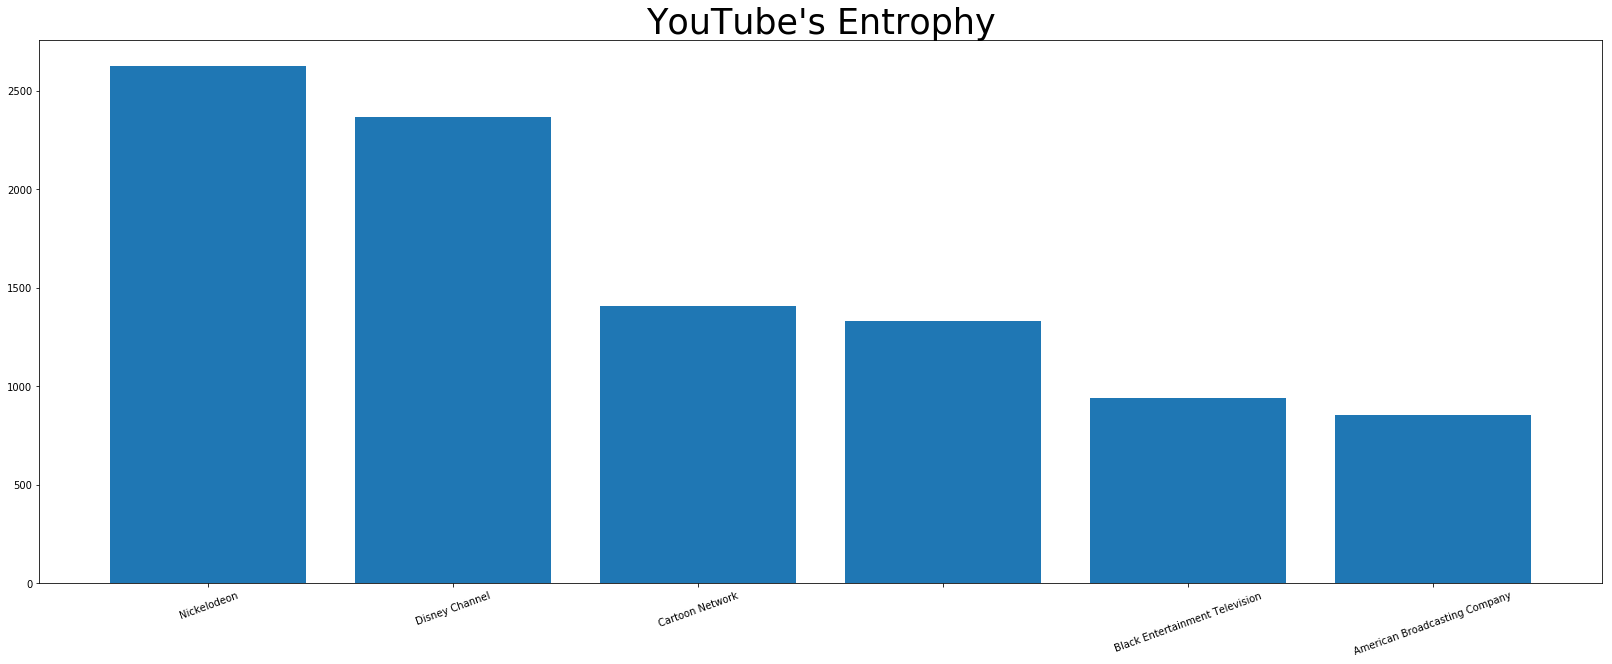

Entrophy is 1.328836


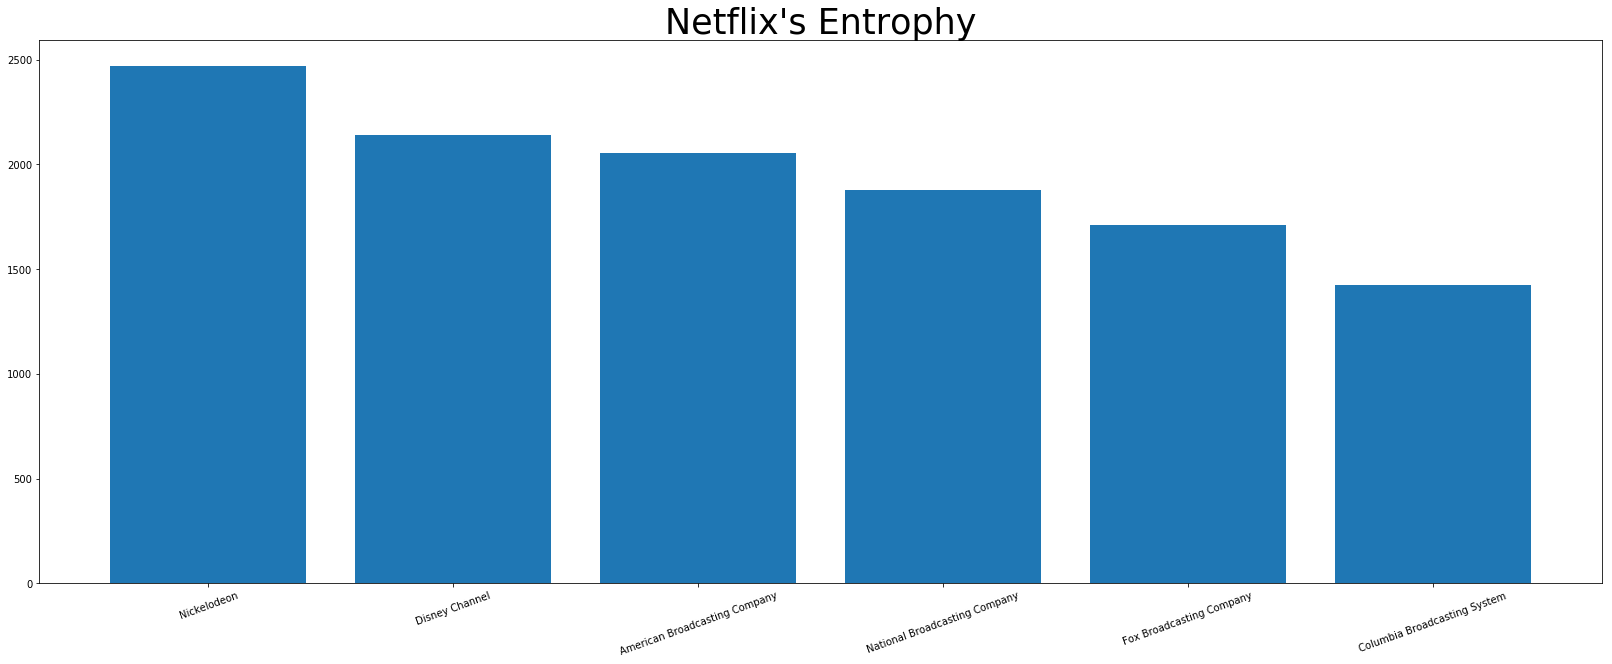

Entrophy is 1.246117


1.2461172961828062

In [468]:
top=6
compute_KL_distance(query2company,"44","CBS's Entrophy",20,top)
compute_KL_distance(query2company,"HBO","HBO's Entrophy",20,top)

compute_KL_distance(query2company,"YouTube","YouTube's Entrophy",20,top)
compute_KL_distance(query2company,"Netflix","Netflix's Entrophy",20,top)

In [508]:
methods = {"entropy":compute_entropy,"l2":compute_l2}

In [524]:
import heapq
def rank(data, method,min_word, top=5,first=1000):
    heap = []
    small_count = []
    for each in data:
        score = methods[method](data,each,"",20,top)
        if total(data[each]) <=1 :
            continue
        if (2<=total(data[each])) and (total(data[each]) <=min_word):
            total_count  = total(data[each])
            tmp = Counter(dict(data[each]))
            most_count = tmp.most_common(1)[0][1]
            ratio = most_count/total_count
            if (ratio>0.5):
                heapq.heappush(small_count, (ratio,each))
            continue
        if method == "entropy":
            heapq.heappush(heap, (score,each))
        elif method == "l2":
            heapq.heappush(heap, (-score,each))
    return heapq.nsmallest(first,heap),small_count

1) all queries that have a least 6 instances, and he entropy is calculated with the counts of the first 6 channel name. This would ensure that queries that don't have a lot counts won't interfere with the results. Because lower counts means lower entropy in general

# Query -> Channel

In [525]:
result,result_small = rank(query2company,"entropy",5,6,1000)

In [526]:
print(result)

[(-0.0, '111'), (-0.0, '112'), (-0.0, '119'), (-0.0, '137'), (-0.0, '179'), (-0.0, '244'), (-0.0, '357'), (-0.0, '415'), (-0.0, '422'), (-0.0, '423'), (-0.0, '431'), (-0.0, '432'), (-0.0, '433'), (-0.0, '440'), (-0.0, '448'), (-0.0, '609'), (-0.0, '611'), (-0.0, '612'), (-0.0, '613'), (-0.0, '621'), (-0.0, '687'), (-0.0, '818'), (-0.0, '820'), (-0.0, 'ABC 13'), (-0.0, 'ABC HD'), (-0.0, 'ABC channel'), (-0.0, 'AHC'), (-0.0, 'AXS'), (-0.0, 'American Heroes Channel'), (-0.0, 'Animal Channel'), (-0.0, 'Antenna TV'), (-0.0, 'BBC'), (-0.0, 'BBC America'), (-0.0, 'BBC World News'), (-0.0, 'BET BET'), (-0.0, 'BET Channel'), (-0.0, 'BET HD'), (-0.0, 'BET Her'), (-0.0, 'BET plus'), (-0.0, 'BT'), (-0.0, 'Baby'), (-0.0, 'Baby Channel'), (-0.0, "Baby's 1st"), (-0.0, 'Bar rescue'), (-0.0, 'Bounce'), (-0.0, 'Bounce TV'), (-0.0, 'Bravo TV'), (-0.0, 'Buzzr'), (-0.0, 'C-SPAN'), (-0.0, 'CBS CBS'), (-0.0, 'CBS HD'), (-0.0, 'CLTV'), (-0.0, 'CNN CNN'), (-0.0, 'CNN HD'), (-0.0, 'CNN en Español'), (-0.0, 'CNN

2) for queries with counts < 6, It makes more sense to just see if the channel with most count account for more than 50% of the total counts.

In [512]:
print(len(result_small))

825


In [527]:
print(result_small)

[(0.6, '233'), (0.6, '834'), (0.6, 'Billions'), (0.6, 'All that'), (0.6, 'Zootopia'), (0.6, 'Channel 32'), (0.6, 'Gilmore Girls'), (0.6, 'Alvin and the Chipmunks'), (0.6, 'USA soccer'), (0.6666666666666666, '198'), (0.6, 'iCarly'), (0.6, 'Just Roll with It'), (0.6, 'Channel 60'), (0.6, 'SVU'), (0.6666666666666666, '359'), (0.6666666666666666, '231'), (0.6, 'Supernatural'), (0.6666666666666666, 'Elementary'), (0.6666666666666666, '658'), (0.6666666666666666, '203'), (0.6666666666666666, '437'), (0.6666666666666666, '990'), (0.6666666666666666, 'Black-ish'), (0.6, 'Show me recordings'), (0.6666666666666666, '141'), (0.6666666666666666, '209'), (0.6666666666666666, '832'), (0.6666666666666666, '123'), (0.6666666666666666, '103'), (0.6666666666666666, '905'), (0.6666666666666666, '73'), (0.6666666666666666, 'Channel 55'), (0.6666666666666666, '288'), (0.6666666666666666, '550'), (0.6666666666666666, '195'), (0.6666666666666666, 'Jack Ryan'), (0.6666666666666666, 'Nosferatu'), (0.6666666666

defaultdict(<class 'int'>, {'Local Information and Events': 1, 'Freeform': 1, 'STARZ': 2, 'Turner Broadcasting System': 1, 'Disney Junior': 1, 'National Basketball Association TV': 1})


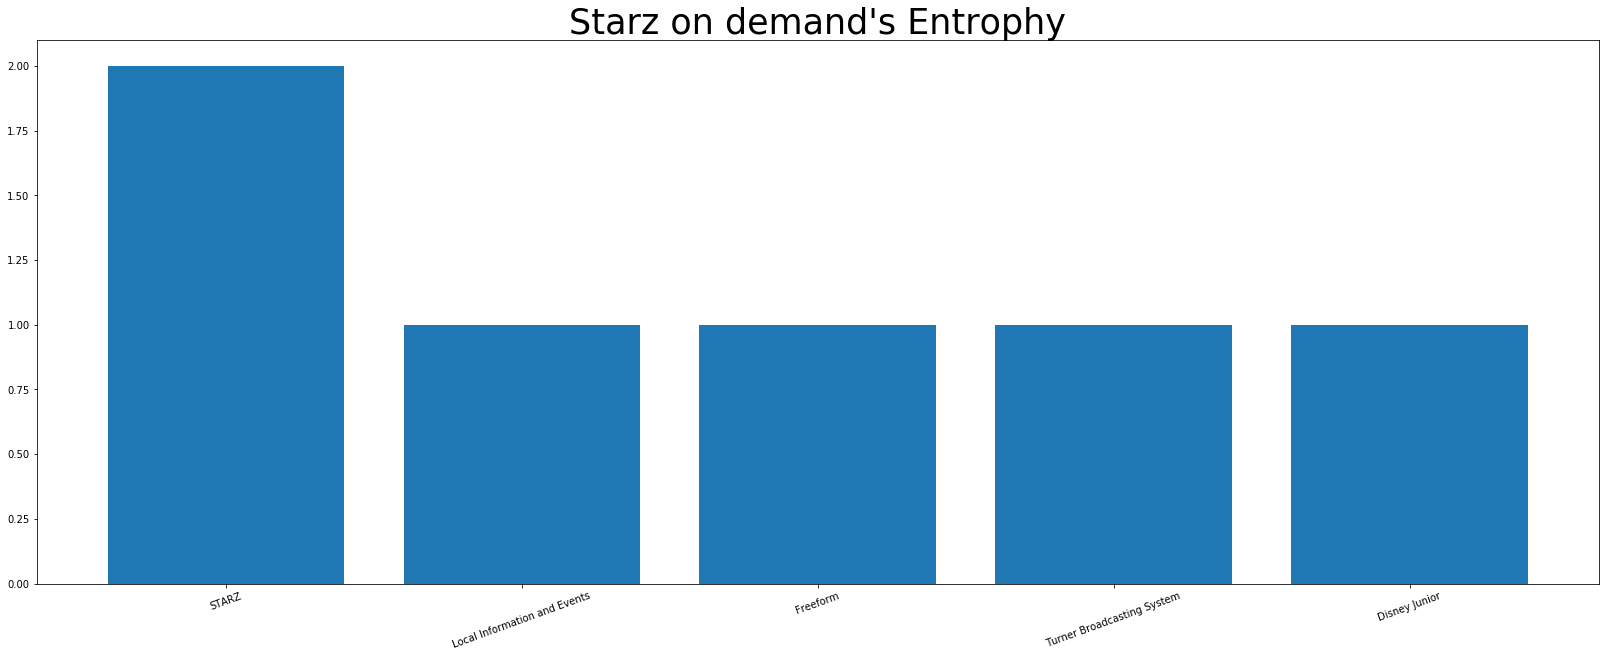

1.5607104090414063


In [530]:
#Kitchen Nightmares
#New York Yankees
top = 5
var = "Starz on demand"
print(query2company[var])
print(compute_entropy(query2company,var,"%s's Entrophy"%(var),20,top))
# print(query2company["New York Yankees"])
# print(compute_entropy(query2company,"New York Yankees","New York Yankees's Entrophy",20,top))


In [399]:
print(len(result), len(result_small))

1000 1282


In [535]:
def find_max(data,w):
    return max(data[w], key=lambda key:data[w][key])

# maximum score can be -ln(1/top), which for top =6 is around 1.79.
threshold = 1.45

list1 = [x[1] for x in result if (float(x[0]) <=threshold)]
list2 = [x[1] for x in result_small]
list3 = set(list1 + list2)
training_pairs = [(x,find_max(query2company,x)) for x in list3]

In [537]:
print(len(list1))

590


In [541]:
print(len(training_pairs))

1415


# Query -> Program 

In [531]:
result2,result2_small = rank(query2program,"entropy",5,6,1000)

In [532]:
print(result2)

[(-0.0, '448'), (-0.0, 'BET BET'), (-0.0, 'Captain America Civil War'), (-0.0, 'Captain America: Civil War'), (-0.0, 'Classic Country'), (-0.0, 'Doctor Strange'), (-0.0, 'Fifty Shades Darker'), (-0.0, 'Good dinosaur'), (-0.0, 'Great Food truck Race'), (-0.0, 'Greatest Showman'), (-0.0, 'Grown Ups 2'), (-0.0, 'Guardians of the Galaxy 2'), (-0.0, 'Home Alone 2'), (-0.0, 'Housewives of Potomac'), (-0.0, 'Keanu'), (-0.0, 'Kong: Skull Island'), (-0.0, 'Lemonade Mouth'), (-0.0, 'Moneyball'), (-0.0, 'Monsters University'), (-0.0, 'News 12 New Jersey'), (-0.0, 'Night School'), (-0.0, 'Princess and the frog'), (-0.0, 'Real Time with Bill Maher'), (-0.0, 'Sandlot'), (-0.0, 'Shrek the Third'), (-0.0, 'Smallfoot'), (-0.0, 'Smooth jazz'), (-0.0, 'Soft rock'), (-0.0, 'Soundscapes'), (-0.0, 'SportsCenter'), (-0.0, 'St. Louis Cardinals'), (-0.0, 'The Good Dinosaur'), (-0.0, 'The Price is right'), (-0.0, 'Today show'), (0.15841057013179086, 'Tangled'), (0.1985152433458726, 'A Star Is Born'), (0.2130430

In [521]:
print(query2program["HBO Crashbox"])

defaultdict(<class 'int'>, {'8012219522271345112': 1})


In [533]:
print(result2_small)

[(0.6, '21 Jump Street'), (0.6, '90 Day'), (0.6, '4K'), (0.6, 'Beat Bobby Flay'), (0.6, '90 Day Fiancé'), (0.6, '834'), (0.6, '895'), (0.6, 'Bloomberg TV'), (0.6, 'Go to BET'), (0.6, 'Annie'), (0.6, 'The Golf Channel'), (0.6, 'Good Bones'), (0.6, 'Watch FS1'), (0.6, 'SEC'), (0.6666666666666666, '851'), (0.6666666666666666, 'Classic Rock'), (0.6, 'Dinosaur Train'), (0.6, 'PHL 17'), (0.6, 'Go to MSNBC'), (0.6, 'The Princess and the Frog'), (0.6, 'Go to E!'), (0.6, 'The old man in the Gun'), (0.6, 'Zootopia'), (0.6, 'US vs. Spain'), (0.6, 'Hallmark Hallmark'), (0.6666666666666666, '364'), (0.6666666666666666, '990'), (0.6666666666666666, '1174'), (0.6, 'Wonderpark'), (0.6666666666666666, 'BlacKkKlansman'), (0.6666666666666666, 'Dolphin Tale 2'), (0.6666666666666666, 'TV Venezuela'), (0.6666666666666666, 'Fox Business Channel'), (0.6666666666666666, 'C-SPAN3'), (0.6666666666666666, '260'), (0.6, 'Property Brothers'), (0.6666666666666666, '103'), (0.6666666666666666, 'CONCACAF'), (0.6666666

In [539]:
threshold = 1.45

list4 = [x[1] for x in result2 if (float(x[0]) <=threshold)]
list5 = [x[1] for x in result2_small]
list6 = set(list4 + list5)
training_pairs2 = [(x,find_max(query2program,x)) for x in list6]

In [540]:
print(len(training_pairs2))

815


In [542]:
print(training_pairs2[:5])

[('E! channel', '7413412647804520112'), ('BET awards on demand', '2019 BET Awards'), ('Karate kid', 'The Karate Kid'), ('Apollo 11', 'Apollo 11'), ('Andi Mack', '5353871819624052112')]
